In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d
import scipy as sp
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import animation
import os
%matplotlib inline 



# Lectura de los datos

Se cargan los datos producidos por SIESTA

In [2]:
dat = np.loadtxt("diamond.dat")

Luego se hace un plot para ver el potencial obtenido en los diferentes parametros red en la estructura FCC del diamante 

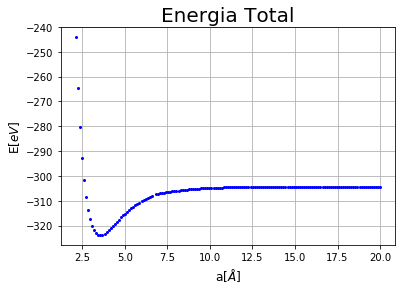

In [4]:
figsize=(20,7)
plt.plot(dat[:,0],dat[:,1],"bo",markersize=2.0)
plt.grid(True)
plt.xlabel("a[$\AA}$]",fontsize = 12)
plt.ylabel("E[$eV$]",fontsize = 12)
plt.title("Energia Total",fontsize = 20)
plt.savefig("Puntos.png")




Ahora para conocer el pvalor más aproxiamdo a el mínimo de potencial, que nos dará la estructura etable, hacemos una extrapolación lineal, obteniendo la siguiente grafica

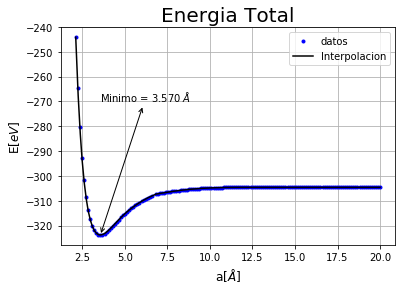

In [6]:
x = dat[:,0]
y = dat[:,1]
f2 = interp1d(x,y)
xnew =np.linspace(np.min(x),np.max(x),num=1000,endpoint=True)
plt.plot(x,y,".b",xnew,f2(xnew),"-k")
plt.annotate("Minimo = "+str(xnew[np.argmin(f2(xnew))])[:5]+" $\AA$", xy=(xnew[np.argmin(f2(xnew))],np.min(f2(xnew))),xytext=(xnew[np.argmin(f2(xnew))],-270),arrowprops=dict(arrowstyle="<->"))

plt.legend(["datos","Interpolacion"],loc="best")
plt.xlabel("a[$\AA}$]",fontsize = 12)
plt.ylabel("E[$eV$]",fontsize = 12)
plt.title("Energia Total",fontsize = 20)
plt.grid(True)
plt.savefig("Interpolacion.png")

Luego de esto se puede encontrar facilmente el mínimos obteniendo $a = 3.5704$ como el parámetro de red en el mínimo del potencial, señalado en la gráfica. 

Luego de esto la misión principal es poder calcular la energía de cohesión del diamante, para este fin calculamos la energia cuando los átomo estan muy lejos entre si, este criterio de muy lejos se toma como alrededor de 5 veces el radio . Se hace una linealización y se encuentra la diferencia entre el mínimo del potencial y la energía en el infito 

Energia de Cohesion  9.531453778039918 Error  22.677062999768403 %
Parametro de red 3.570469799459459
-152.34535822160976
-161.87681199964968


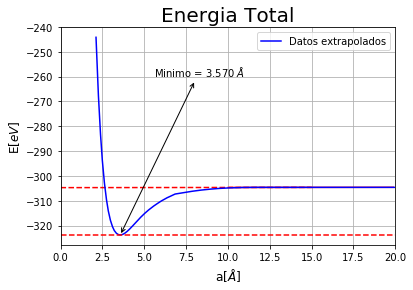

In [7]:
X = []
Y = []
for i in range(len(x)):
    if x[i] >= 10 and x[i] < 20:
        X.append(x[i])
        Y.append(y[i])

        
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(X,Y)
polynomial = np.poly1d([slope, intercept])
line = polynomial(X)
plt.plot(X, line, 'r-')#,label = "linealizacion $R ={0:.3f}$".format(r_value))
#plt.plot(X,Y,".k")

dom = np.linspace(0,15,100)
plt.plot(dom, slope*dom + intercept,"r--")

x = dat[:,0]
y = dat[:,1]
f2 = interp1d(x,y,kind="slinear")
xnew =np.linspace(np.min(x),np.max(x),num=1000,endpoint=True)
#plt.plot(x,y,".k",xnew,f2(xnew),"-b")
plt.plot(xnew,f2(xnew),"b-",label = "Datos extrapolados")
plt.annotate("Minimo = "+str(xnew[np.argmin(f2(xnew))])[:5]+" $\AA$", xy=(xnew[np.argmin(f2(xnew))],np.min(f2(xnew))),xytext=(xnew[np.argmin(f2(xnew))]+2,-260),arrowprops=dict(arrowstyle="<->"))
plt.axhline(y=np.min(f2(xnew)), color='r', linestyle='--')
plt.legend(loc="best")
plt.xlabel("a[$\AA}$]",fontsize = 12)
plt.ylabel("E[$eV$]",fontsize = 12)
plt.title("Energia Total",fontsize = 20)
plt.grid(True)
plt.xlim(0,20.0)

print "Energia de Cohesion ", (intercept - np.min(f2(xnew)))/2.0,"Error ",abs(7.37-(intercept - np.min(f2(xnew)))/2.0)/((intercept - np.min(f2(xnew)))/2.0) * 100, "%"
print "Parametro de red", xnew[np.argmin(f2(xnew))]
print intercept/2.0
print np.min(f2(xnew))/2.0
plt.savefig("cohesion.png")




Obteniendo como resultado para la energía de cohesion un valor de $E = 9.53 eV$

# Propuesta de código para leer los archivos con extensión .cube

In [106]:
f = open("C.RHO.cube","r")
comentario1 = f.readline()
comentario2 = f.readline()
No = f.readline().split() # numero de atomos en el origen
Natomos = int(No[0])
origen = np.array([float(No[1]),float(No[2]),float(No[3])])
NVoxel = f.readline().split()
Nx = int(NVoxel[0])
X =np.array([float(NVoxel[1]),float(NVoxel[2]),float(NVoxel[3])])
NVoxel = f.readline().split()
Ny = int(NVoxel[0])
Y =np.array([float(NVoxel[1]),float(NVoxel[2]),float(NVoxel[3])])
NVoxel = f.readline().split()
Nz = int(NVoxel[0])
Z =np.array([float(NVoxel[1]),float(NVoxel[2]),float(NVoxel[3])])
atomos = []
atomosXYZ = []
for atom in range(Natomos):
    line = f.readline().split()
    atomos.append(line[0])
    atomosXYZ.append(map(float,[line[2],line[3],line[4]]))
datos = np.zeros((Nx,Ny,Nz))
i=0
for s in f:
    for v in s.split():
        datos[i/(Ny*Nz),(i/Nz)%Ny,i%Nz] = float(v)
        i += 1
    


# Graficas del calculo de la densidad electrónica

Se utilizo el código "cube.py" que esta en el GitHub para leer los datos producidos por DENCHAR, modulo auxiliar del paquete computacional SIESTA en formato .cube. En este se hace un plot 3D de como se vería la disposición electrónica en intensidad

/Users/macbookpro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]


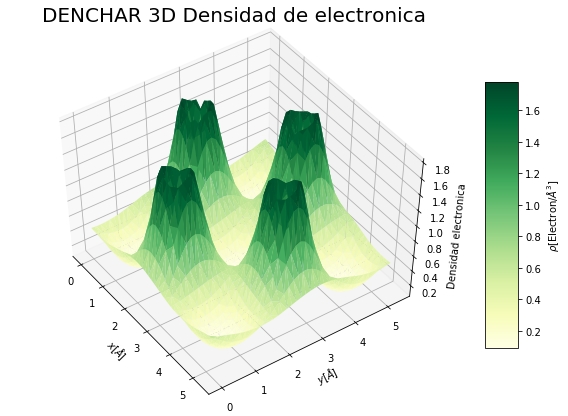

In [195]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import numpy as np

data = np.loadtxt("desidad1.dat")
#X, Y =np.meshgrid(zip(*data)[axe_labels.index(var_axe1)],zip(*data)[axe_labels.index(var_axe2)])
X,Y=zip(*data)[1],zip(*data)[2]
Z = zip(*data)[3]

#print "max Z: ", max(Z)
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
plt.hold(True)
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf = ax.plot_trisurf(X, Y, Z, cmap="YlGn", linewidth=0.2)
cbar = fig.colorbar(surf, shrink=0.7, aspect=8)
cbar.set_label('$\\rho$[Electron/$\AA^{3}$]')
ax.set_xlabel("$x[\AA]$")
ax.set_ylabel("$y[\AA]$")
ax.set_zlabel('Densidad electronica')
ax.view_init(elev=50, azim=-35)
ax.set_title("DENCHAR 3D Densidad de electronica",fontsize = 20,y=1.08)
#ax.scatter(X,Y,Z, marker='.', s=10, c="black", alpha=0.5)
plt.savefig("Densidad.png")


Luego vemos la función de onda asociada a esta densidad electronica

/Users/macbookpro/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]


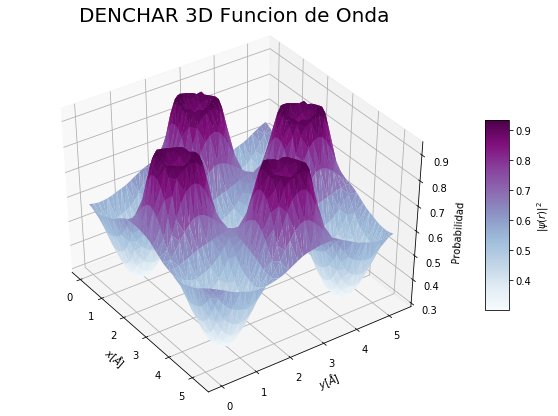

In [196]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import numpy as np

data = np.loadtxt("psi1up.dat")
#X, Y =np.meshgrid(zip(*data)[axe_labels.index(var_axe1)],zip(*data)[axe_labels.index(var_axe2)])
X,Y=zip(*data)[1],zip(*data)[2]
Z = zip(*data)[3]

#print "max Z: ", max(Z)
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
plt.hold(True)
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
surf = ax.plot_trisurf(X, Y, Z, cmap="BuPu", linewidth=0.2)
cbar = fig.colorbar(surf, shrink=0.5, aspect=8)
cbar.set_label('$|\psi(r)|^{2}$')
ax.set_xlabel("$x[\AA]$")
ax.set_ylabel("$y[\AA]$")
ax.set_zlabel('Probabilidad')
ax.view_init(elev=40, azim=-35)
ax.set_title("DENCHAR 3D Funcion de Onda",fontsize = 20,y=1.08)
#ax.scatter(X,Y,Z, marker='.', s=10, c="black", alpha=0.5)
plt.savefig("FO.png")



Dada la disposición de los datos se hace una función auxiliar para poder respresentar los datos 2D

In [197]:
from numpy import linspace, meshgrid
from matplotlib.mlab import griddata

def grid(x, y, z, resX=100, resY=100):
    xi = linspace(min(x), max(x), resX)
    yi = linspace(min(y), max(y), resY)
    Z = griddata(x, y, z, xi, yi, interp = "linear")
    X, Y = meshgrid(xi, yi)
    return X, Y, Z



Obteniendo lo siguiente resultados, en donde podemos hacer una comparación entre la densidad electrónica y la fución de onda

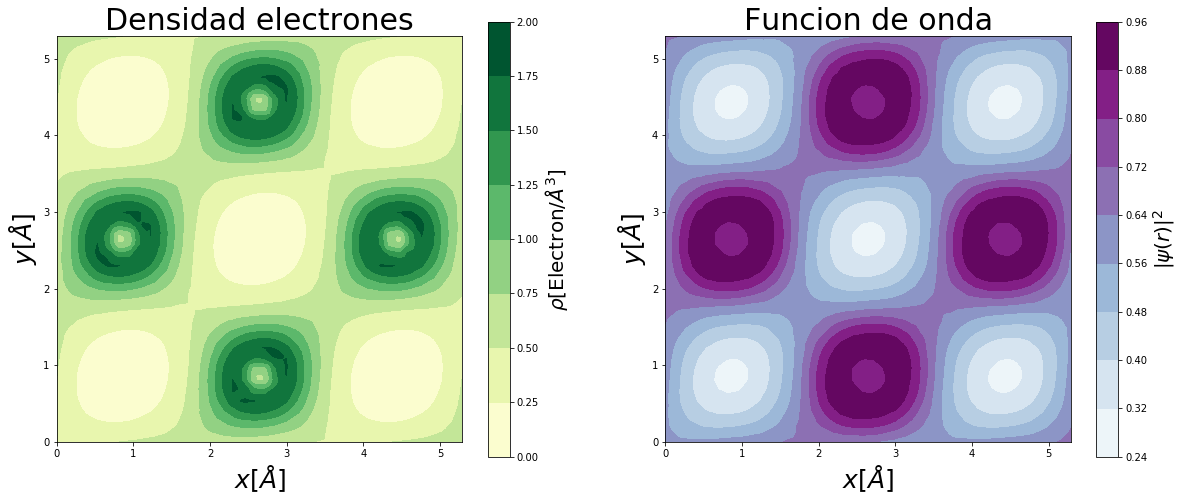

In [230]:
rho = np.loadtxt("desidad1.dat")
psi = np.loadtxt("psi1up.dat")

rhoX,rhoY=zip(*rho)[1],zip(*rho)[2]
rhoZ = zip(*rho)[3]
rhox, rhoy, rhoz = grid(rhoX, rhoY, rhoZ)

psiX,psiY=zip(*psi)[1],zip(*psi)[2]
psiZ = zip(*psi)[3]
psix, psiy, psiz = grid(psiX, psiY, psiZ)

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(wspace=0.2)

ax1 = fig.add_subplot(121)
p1 = ax1.contourf(rhox, rhoy, rhoz,cmap="YlGn")
ax1.set(adjustable='box-forced', aspect='equal')
ax1.set_xlabel("$x[\AA]$", fontsize = 25)
ax1.set_ylabel("$y[\AA]$", fontsize = 25)
ax1.set_title("Densidad electrones",fontsize=30)
cbar = fig.colorbar(p1, ax=ax1,shrink=0.40, aspect=20) # be explicit about ax1
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$\\rho$[Electron/$\AA^{3}$]',fontsize=20)

ax2 = fig.add_subplot(122)
p2 = ax2.contourf(psix, psiy, psiz,cmap="BuPu")
ax2.set(adjustable='box-forced', aspect='equal')
ax2.set_xlabel("$x[\AA]$", fontsize = 25)
ax2.set_ylabel("$y[\AA]$", fontsize = 25)
ax2.set_title("Funcion de onda",fontsize=30)
cbar = fig.colorbar(p2, ax=ax2,shrink=0.40, aspect=20) # be explicit about ax1
cbar.ax.tick_params(labelsize=10)
cbar.set_label('$|\psi(r)|^{2}$',fontsize =20)
plt.savefig("comparacion.png")

# Ahora nos ocupamos de el calculo de la frecuencia fotónica

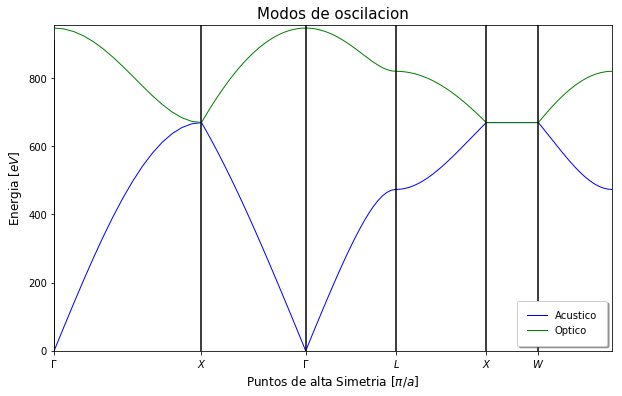

In [239]:
fig = plt.figure(figsize=(10,6))
data = np.loadtxt("C.bands")
plt.plot(data[:,0],data[:,1],"b-",linewidth=1,label = "Acustico")
plt.plot(data[:,0],data[:,4],"g-",linewidth=1,label = "Optico")
plt.axvline(x=0,ymin=0, ymax=0.95, color='k', linestyle='-') #Gamma
plt.axvline(x=1.316954, color='k', linestyle='-') #X
plt.axvline(x=2.248180, color='k', linestyle='-') #Gamma
plt.axvline(x=3.054646, color='k', linestyle='-') #L
plt.axvline(x=3.861112, color='k', linestyle='-') #X
plt.axvline(x=4.326726, color='k', linestyle='-') #W
plt.xlim(0,np.max(data[:,0]))
plt.ylim(0,np.max(data[:,4])+10)
plt.xlabel("Puntos de alta Simetria $[\pi/a]$",fontsize = 12)
plt.ylabel("Energia $[eV]$",fontsize = 12)
x = np.array([0,1.316954,2.248180,3.054646,3.861112,4.326726])
my_xticks = ['$\Gamma$', '$X$', '$\Gamma$', '$L$','$X$',"$W$"]
plt.xticks(x, my_xticks)
plt.title("Modos de oscilacion", fontsize = 15)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.savefig("Bandas.png")


In [4]:
pol = np.loadtxt("dipolo.dat")
pol[:,0]

array([12.26845638, 12.38926174, 12.51006711, 12.63087248, 12.75167785,
       12.87248322, 12.99328859, 13.11409396, 13.23489933, 13.3557047 ,
       13.47651007, 13.59731544, 13.71812081, 13.83892617, 13.95973154,
       14.08053691, 14.20134228, 14.32214765, 14.44295302, 14.56375839,
       14.68456376, 14.80536913, 14.9261745 , 15.04697987, 15.16778523,
       15.2885906 , 15.40939597, 15.53020134, 15.65100671, 15.77181208,
       15.89261745, 16.01342282, 16.13422819, 16.25503356, 16.37583893,
       16.4966443 , 16.61744966, 16.73825503, 16.8590604 , 16.97986577,
       17.10067114, 17.22147651, 17.34228188, 17.46308725, 17.58389262,
       17.70469799, 17.82550336, 17.94630872, 18.06711409, 18.18791946,
       18.30872483, 18.4295302 , 18.55033557, 18.67114094, 18.79194631,
       18.91275168, 19.03355705, 19.15436242, 19.27516779, 19.39597315,
       19.51677852, 19.63758389, 19.75838926, 19.87919463, 20.        ])

Text(0,0.5,u'(a.u.)')

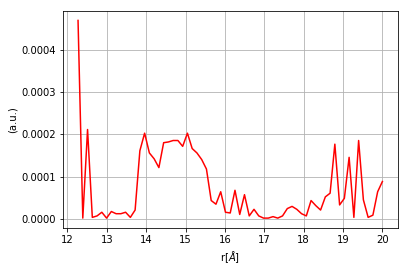

In [12]:
plt.plot(pol[:,0],np.sqrt(pol[:,1]**2+pol[:,2]**2+pol[:,3]**2),"r-")
#plt.plot(1,1)
plt.grid(True)
plt.xlabel("r[$\AA$]")
plt.ylabel("(a.u.)")
